In [1]:
import pandas as pd
import numpy as np # this is to handle numerical operation in the dataframe and during training the model.
from matplotlib import pyplot as plt # to visualize the confusion matrix table the model creates

In [2]:
dataset=pd.read_csv("Social_Network_Ads.csv")

In [3]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [4]:
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [5]:
#400 rows =400 samples.5 columns= 5 features
#now we find if the dataset is balanced or imbalanced

In [6]:
dataset["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [7]:
# so the dataset is imbalalnced and the model will be trained with a bias towards the class with higher count. so in such case we have to use parameters 
#like precision,recall to check if the model is performing accurately and effectively.


In [8]:
dataset.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [9]:
independent=dataset[["User ID", "Age", "EstimatedSalary", "Gender_Male"]]
independent

,User ID,Age,EstimatedSalary,Gender_Male
0,15624510,19,19000,1
1,15810944,35,20000,1
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,1
...,...,...,...,...
395,15691863,46,41000,0
396,15706071,51,23000,1
397,15654296,50,20000,0
398,15755018,36,33000,1


In [10]:
dependent=dataset['Purchased']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=.30,random_state=0)

In [13]:
x_train,x_test,y_train,y_test

(      User ID  Age  EstimatedSalary  Gender_Male
 92   15809823   26            15000            1
 223  15593715   60           102000            1
 234  15619407   38           112000            0
 232  15813113   40           107000            1
 377  15800215   42            53000            0
 ..        ...  ...              ...          ...
 323  15619465   48            30000            0
 192  15779581   29            43000            1
 117  15591433   36            52000            1
 47   15776348   27            54000            0
 172  15794661   26           118000            0
 
 [280 rows x 4 columns],
       User ID  Age  EstimatedSalary  Gender_Male
 132  15725660   30            87000            1
 309  15652400   38            50000            0
 341  15776844   35            75000            1
 196  15738448   30            79000            0
 246  15638003   35            50000            0
 ..        ...  ...              ...          ...
 216  15636023   49    

In [14]:
#now we create the model

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model= DecisionTreeClassifier()

In [20]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
y_predict=model.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm=confusion_matrix(y_predict,y_test)

In [31]:
cm


array([[69,  8],
       [10, 33]], dtype=int64)

In [32]:
from sklearn import tree#same as befor once the model is created we omport tree from sklearn and make it to plot a tree with the plot_tree function
#to visualize it we use pyplot as plt imported from matplotlib

[Text(0.5050675675675675, 0.9583333333333334, 'x[1] <= 43.5\ngini = 0.463\nsamples = 280\nvalue = [178, 102]'),
 Text(0.2972972972972973, 0.875, 'x[2] <= 90500.0\ngini = 0.293\nsamples = 202\nvalue = [166, 36]'),
 Text(0.40118243243243246, 0.9166666666666667, 'True  '),
 Text(0.1891891891891892, 0.7916666666666666, 'x[0] <= 15594948.5\ngini = 0.07\nsamples = 166\nvalue = [160, 6]'),
 Text(0.13513513513513514, 0.7083333333333334, 'x[2] <= 86500.0\ngini = 0.278\nsamples = 24\nvalue = [20, 4]'),
 Text(0.10810810810810811, 0.625, 'x[0] <= 15594669.5\ngini = 0.165\nsamples = 22\nvalue = [20, 2]'),
 Text(0.08108108108108109, 0.5416666666666666, 'x[0] <= 15574115.5\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.05405405405405406, 0.4583333333333333, 'x[2] <= 56000.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.02702702702702703, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08108108108108109, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.10810810810

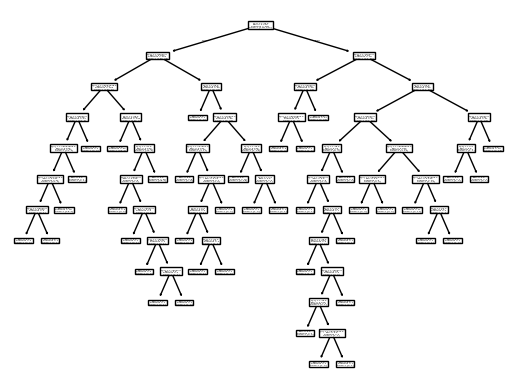

In [33]:
tree.plot_tree(model)

In [25]:
#so nowe get a confusion matrix table now to analyse the model we create a classification report

In [26]:
from sklearn.metrics import classification_report

In [27]:
clf=classification_report(y_predict,y_test)

In [28]:
clf

'              precision    recall  f1-score   support\n\n           0       0.87      0.90      0.88        77\n           1       0.80      0.77      0.79        43\n\n    accuracy                           0.85       120\n   macro avg       0.84      0.83      0.84       120\nweighted avg       0.85      0.85      0.85       120\n'

In [29]:
print(clf)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        77
           1       0.80      0.77      0.79        43

    accuracy                           0.85       120
   macro avg       0.84      0.83      0.84       120
weighted avg       0.85      0.85      0.85       120

